# 机器学习#1：线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 单变量线性回归

案例：人口与利润

读取文件到pandas的dataframe、查看数据属性、可视化

In [2]:
data = pd.read_csv('ex1data1.txt', names = ['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


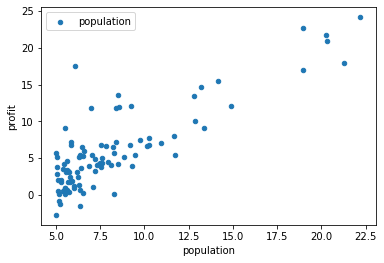

In [5]:
data.plot.scatter(x='population', y='profit', label='population')
plt.show()

**构造矩阵**

添加一列1

In [6]:
data.insert(0, 'ones', 1)
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


变量初始化，X: training data; y: target variable。

X截取所有(行，0到最后一列（不含）)；y截取(所有行，最后一列)。

In [7]:
X = data.iloc[:, 0:-1]
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
y = data.iloc[:, -1]
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: profit, dtype: float64

把DataFrame转换成numpy的数组

In [9]:
X = X.values
y = y.values

In [10]:
X.shape

(97, 2)

In [11]:
y.shape

(97,)

In [12]:
y = y.reshape(97, 1)
y.shape

(97, 1)

**定义损失函数**

$$J(\theta)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)=X{\theta }={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

维度： X(m, n)    y(m, 1)    theta(n, 1)

In [13]:
def costFunction(X, y, theta):
    inner = np.power(X @ theta - y, 2)
    return np.sum(inner) / (2 * len(X))

In [14]:
theta = np.zeros((2, 1))

In [15]:
X.shape, theta.shape, y.shape

((97, 2), (2, 1), (97, 1))

In [16]:
# 看一下初始的代价
cost_init = costFunction(X, y, theta)
print(cost_init)

32.072733877455676


**梯度下降**

$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$
$$
\theta = \theta - \alpha \frac{1}{m}X^T(X\theta - y)
$$

In [17]:
def gradientDescent(X, y, theta, alpha, iters):
    costs = []
    for i in range(iters):
        theta = theta - (X.T @ (X @ theta - y)) * alpha / len(X)
        cost = costFunction(X, y, theta)
        costs.append(cost)
        
        if i % 100 == 0:
            print(i, cost)
        
    return theta, costs

In [18]:
alpha = 0.01
iters = 1000

theta, costs = gradientDescent(X, y, theta, alpha, iters)

0 6.737190464870009
100 5.476362817272741
200 5.173634551165022
300 4.962606493117519
400 4.815501494116686
500 4.712956453749759
600 4.6414735988143185
700 4.591643801766725
800 4.5569080784097515
900 4.532694243543437


损失函数可视化

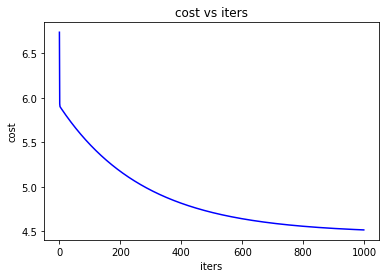

In [19]:
fig, ax = plt.subplots()
ax.plot(np.arange(iters), costs, 'b')    #横轴迭代次数，纵轴cost
ax.set(xlabel='iters', ylabel='cost', title='cost vs iters')
plt.show()

拟合函数可视化

In [20]:
theta

array([[-3.24140214],
       [ 1.1272942 ]])

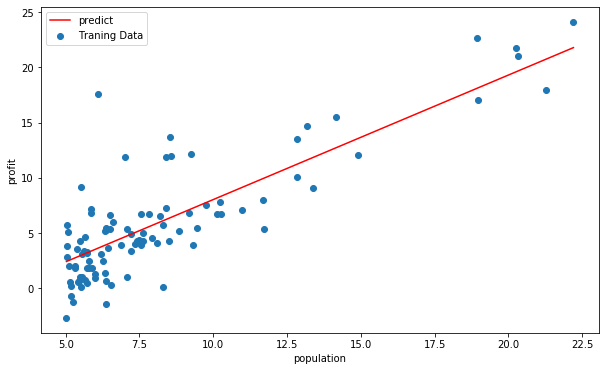

In [21]:
x = np.linspace(data.population.min(), data.population.max(), 100)    # 生成一组点的横轴坐标
h = theta[0, 0] + theta[1, 0] * x    # 对应的纵轴值

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data.population, data.profit, label='Traning Data')  # training data的散点图
ax.plot(x, h, 'r', label='predict')    # 根据 x 和 h 绘制预测的直线图
ax.legend()
ax.set(xlabel='population', ylabel='profit')
plt.show()

## 2. 多变量线性回归

案例：房子价格和房子面机、卧室数量

In [22]:
data2 = pd.read_csv('ex1data2.txt', names=['size', 'bedrooms', 'price'])
data2.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


此任务要进行特征的归一化。

In [23]:
def normalize_feature(data):
    return (data - data.mean()) / data.std()

In [24]:
data2 = normalize_feature(data2)

In [25]:
data2.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


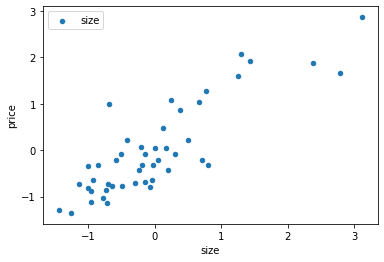

In [26]:
data2.plot.scatter(x='size', y='price', label='size')
plt.show()

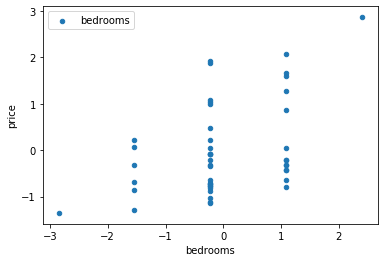

In [27]:
data2.plot.scatter(x='bedrooms', y='price', label='bedrooms')
plt.show()

添加全为1的列

In [28]:
data2.insert(0, 'ones', 1)
data2.head()

,ones,size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


构造数据集

In [29]:
X2 = data2.iloc[:, 0:-1]
X2.head()

,ones,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [30]:
y2 = data2.iloc[:, -1]
y2.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64

DataFrame 转换成数组

In [31]:
X2 = X2.values
y2 = y2.values
X2.shape, y2.shape

((47, 3), (47,))

In [32]:
y2 = y2.reshape(47, 1)
y2.shape

(47, 1)

损失函数，之前的损失函数已经向量化，在多变量的任务中可以直接用。

In [33]:
def costFunction2(X, y, theta):
    inner = np.power(X @ theta - y, 2)
    return np.sum(inner) / (2 * len(X))

In [34]:
theta2 = np.zeros((3, 1))

In [35]:
cost_init2 = costFunction2(X2, y2, theta2)
print(cost_init2)

0.48936170212765967


梯度下降，也可以用前面的。

In [36]:
def gradientDescent2(X, y, theta, alpha, iters, isPrint=False):
    costs = []
    for i in range(iters):
        theta = theta - (X.T @ (X @ theta - y)) * alpha / len(X)
        cost = costFunction(X, y, theta)
        costs.append(cost)
        
        if i % 100 == 0:
            if isPrint:
                print(i, cost)
        
    return theta, costs

查看不同 $\alpha$ 的效果

In [37]:
candinate_alpha2 = [0.0003, 0.003, 0.03, 0.0001, 0.001, 0.01]
iters2 = 2000

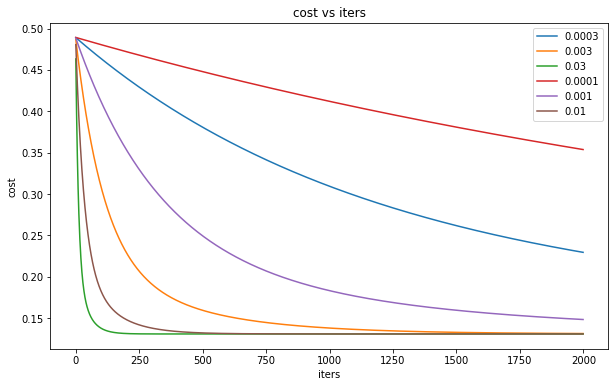

In [38]:
fig, ax = plt.subplots(figsize=(10,6))

for alpha2 in candinate_alpha2:
    _, costs = gradientDescent2(X2, y2, theta2, alpha2, iters2)
    ax.plot(np.arange(iters2), costs, label=alpha2)
    ax.legend()
    
ax.set(xlabel='iters', ylabel='cost', title='cost vs iters')
plt.show()

## 3. 使用库

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [39]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

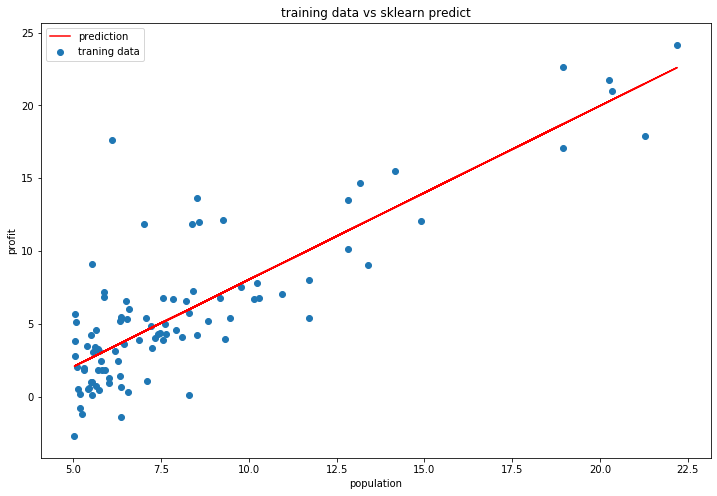

In [40]:
x_skl = data.population
h_skl = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_skl, h_skl, 'r', label='prediction')
ax.scatter(data.population, data.profit, label='traning data')
ax.legend(loc=2)
ax.set(xlabel='population', ylabel='profit', title='training data vs sklearn predict')
plt.show()

## 4.正规方程

正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
 
梯度下降与正规方程的比较：

- 梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	
- 正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

如果矩阵不可逆，一般考虑：
- 求伪逆。
- 特征太多了（m<n），删掉一些特征。

In [41]:
X.shape, y.shape

((97, 2), (97, 1))

In [42]:
def normalEquation(X, y):
    theta3 = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta3

In [43]:
theta3 = normalEquation(X, y)
theta, theta3

(array([[-3.24140214],
        [ 1.1272942 ]]),
 array([[-3.89578088],
        [ 1.19303364]]))

In [44]:
costtheta = costFunction(X, y, theta)
costtheta3 = costFunction(X, y, theta3)
costtheta, costtheta3

(4.515955503078914, 4.476971375975179)